# Modelado con parametros de tabla 1

# A differential equation solution and model.
## Involving contamination, human labor force(work need), natural recourses growth rate, etc.
Basicly looking for sustainability in the enviorment with determined conditions, based in cientifics model equations of those functions interacting with each other

Text(0, 0.5, 'L')

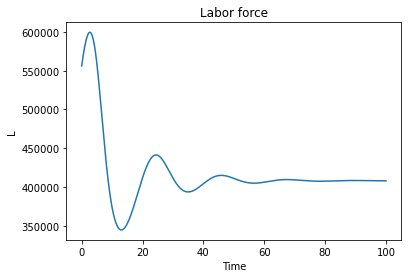

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
def model1(t, v, alpha, beta, G, p, Lmax, lambd, delta, pc, k, K, mu, R, Ymax):
    L,S,C = v
    Y = alpha*beta*S*L+lambd*(1-beta)**delta*L**delta
    #C = (R*Y/Ymax)
    dLdt = (G*Y/L*(1-C)*(1-L/Lmax)-mu)*L
    dSdt = (p*(S/k-1)*(1-S/K)*(1-C)-alpha*beta*L/Lmax)*S
    dCdt = ((R*Y/Ymax)*(1-C)-pc*S)*C
    return (dLdt,dSdt,dCdt)
# Variables:
# S: Renewable recourses
# L: Labor force
# C: Contamination
# Parameters:
G=0.0001  # G: Labor force growth
p=2800
alpha = 9435.446016472968 # alpha: Tech factor
beta=0.414142145555059 # beta: Preference factor
# K: Capital
k = 0.25 #min
K = 1    #max
lambd = 177.5614198542027 # lambd: Proportionality factor
R = 5  # R: factor that increase the production
delta = 1.335916369303556  # delta: Elasticity coefficient
Lmax = 1998435 # Lmax: Max force that region can reach
pc = 0.677384915732847  # pc: regeneration rate of the enviorment
mu = 0.7 # mu: Mortality and/or migratory rate

# psi: Elasticity coefficient, we chose psi=1
Ymax = alpha*beta*Lmax+lambd*(1-beta)**delta*Lmax**delta

t_in=0
t_fin=100
t = np.linspace(t_in, t_fin, 1000)
sol = solve_ivp(model1, [t_in, t_fin], [556000, 0.83, 0.02],args=[alpha, beta, G, p, Lmax, lambd, delta, pc, k, K, mu, R, Ymax], t_eval=t, dense_output=True)

n = sol.sol(t)

plt.plot(t,n[0])
plt.title("Labor force")
plt.xlabel("Time")
plt.ylabel("L")


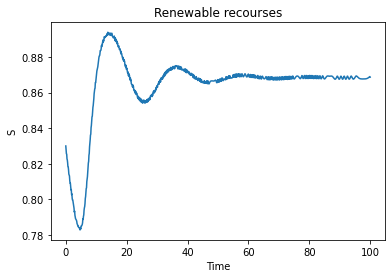

In [44]:
fig, ax = plt.subplots()
ax.plot(t,n[1])
plt.title("Renewable recourses")
plt.xlabel("Time")
plt.ylabel("S")
plt.show()

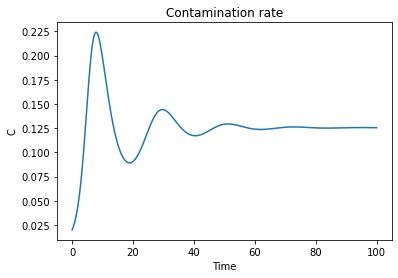

In [45]:
fig, ax = plt.subplots()
ax.plot(t,n[2])
plt.title("Contamination rate")
plt.xlabel("Time")
plt.ylabel("C")
plt.show()

3D modeling

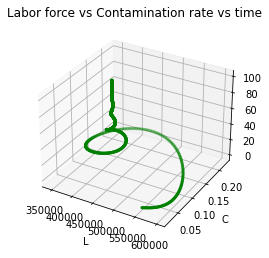

In [46]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()

# 3D graph
ax1 = fig.add_subplot(111,projection='3d')
# bi-dimensional numpy data
x = t
y = n[0]
z = n[2]

ax1.scatter(y, z, x, c='g', marker='.')
plt.title("Labor force vs Contamination rate vs time")
plt.xlabel("L")
plt.ylabel("C")
plt.show()


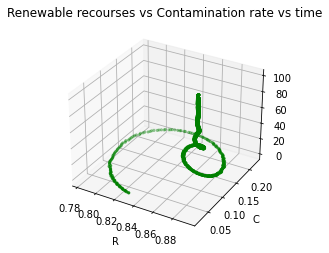

In [47]:
fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d')

x = t
y = n[1]
z = n[2]

ax1.scatter(y, z, x, c='g', marker='.')
plt.title("Renewable recourses vs Contamination rate vs time")
plt.xlabel("R")
plt.ylabel("C")
plt.show()

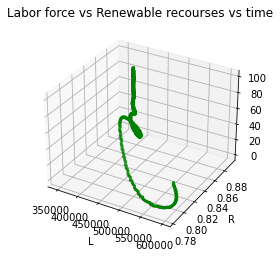

In [48]:
fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d')

x = t
y = n[0]
z = n[1]

ax1.scatter(y, z, x, c='g', marker='.')
plt.title("Labor force vs Renewable recourses vs time")
plt.xlabel("L")
plt.ylabel("R")
plt.show()